# Physics 512 - Optics Lab

## Tucker Knaak - Department of Physics, Creighton University - Spring 2022

### Basic Diffraction Lab

#### This experiment will give you a first-hand introduction to the ways in which the diffraction and interference of light can be observed. Fraunhoffer diffraction refers to the way light passes through a restricted aperture and applies both to single-openings and to real Young’s double slit openings. In this lab you will observe both of these kinds of effects.

In [1]:
'''Required Libraries'''
import matplotlib.pyplot as plt
import numpy as np

'''Required Functions'''
from scipy.odr import ODR, Model, Data, RealData

#### Single Slit Diffraction

##### Measured data of four lengths and peak widths pairs.

In [2]:
'''Reported data'''
length_list = [250, 400, 450, 500]       #length between slit and screen [mm]
width_list = [7.81, 12.92, 14.8, 16.05]  #width of intensity peak [mm]

'''Reported error'''
length_err = [0.5 for _ in range(len(length_list))]
width_err = [0.5 for _ in range(len(width_list))]

'''Given constant'''
b = 0.04  #single slit width [mm]

##### The wavelength as a function of length and peak width is given by $\lambda = \frac{Wb}{2L}.$

The best-fit wavelength is λ = 646.09 ± 2.73nm.


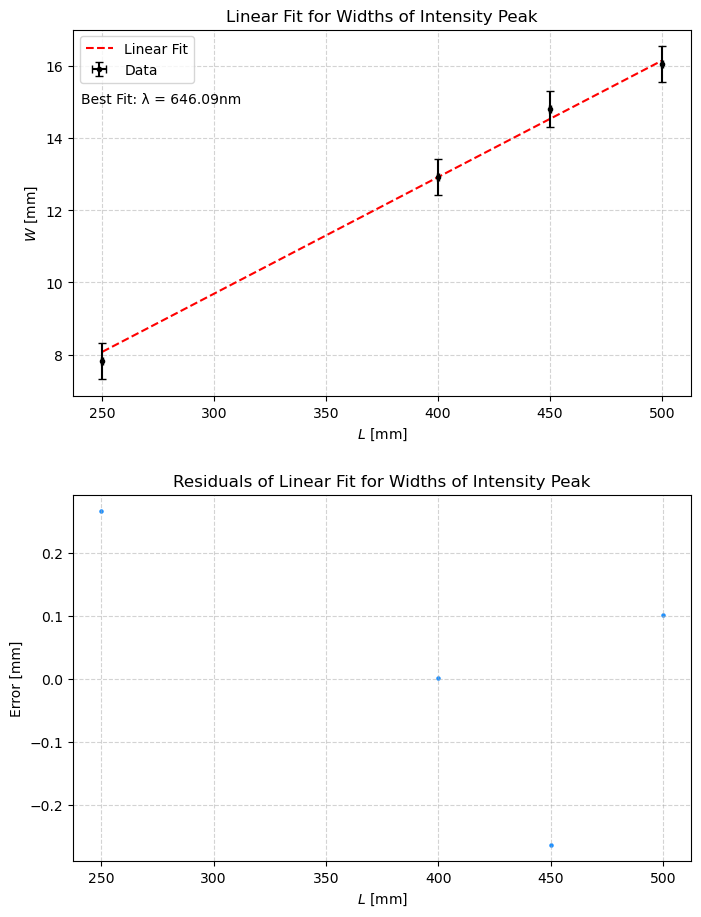

In [3]:
'''Function to calculate the peak widths'''
def width(params: list, L: float):
    W = (2 * L * params[0] * 10**-6) / 0.04
    return W

'''Linear scipy.odr curvefit'''
data = RealData(length_list, width_list, length_err, width_err)
model = Model(width)
pguess = [650]
odr = ODR(data, model, pguess)
output = odr.run()
wavelength, wavelength_err = output.beta[0], output.sd_beta[0] / np.sqrt(len(length_list))
residuals = [width([wavelength], L) - W for L, W in zip(length_list, width_list)]
print(f'The best-fit wavelength is \u03BB = {wavelength:.2f} \u00B1 {wavelength_err:.2f}nm.')

'''Plot results'''
length_points = np.linspace(min(length_list), max(length_list), 100, endpoint = True)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (8, 10))
fig.tight_layout(pad = 5.0)

'''First figure --> Linear fit'''
ax1.set_xlabel('$L$ [mm]')
ax1.set_ylabel('$W$ [mm]')
ax1.set_title('Linear Fit for Widths of Intensity Peak')
ax1.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.5)
ax1.plot(length_points, width([wavelength], length_points), linestyle = 'dashed', color = 'red', label = 'Linear Fit')
ax1.errorbar(length_list, width_list, width_err, length_err, capsize = 3, fmt = 'k.', label = 'Data')
ax1.legend(loc = 'upper left')
ax1.annotate(f'Best Fit: \u03BB = {wavelength:.2f}nm', xy = (0.142, 0.81), xycoords = 'axes fraction',
             ha = 'center', va = 'center', fontsize = 10)

'''Second figure --> Residuals'''
ax2.set_xlabel('$L$ [mm]')
ax2.set_ylabel('Error [mm]')
ax2.set_title('Residuals of Linear Fit for Widths of Intensity Peak')
ax2.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.5)
ax2.scatter(length_list, residuals, color = 'dodgerblue', s = 5)

'''Save figure'''
fig.savefig('c:/Users/Tucker Knaak/Downloads/WavelengthSingleSlit_LinearFit.png')

#### Circular Aperture Diffraction

##### Measured data of four lengths and Airy disk diameters pairs.

In [4]:
'''Reported data'''
length_list = [850, 900, 950, 1000]       #length between circular aperture and screen [mm]
diameter_list = [4.79, 5.21, 5.22, 4.67]  #diameter of Airy disk [mm]

'''Reported error'''
length_err = [0.5 for _ in range(len(length_list))]
diameter_err = [0.1 for _ in range(len(diameter_list))]

'''Given constant'''
D = 0.4  #diameter of circular aperture [mm]

##### The wavelength as a function of length and diameter of the circular aperture is given by $\lambda=\frac{Dd_{Airy}}{2.44L}.$

The best-fit wavelength is λ = 877.64 ± 21.30nm.


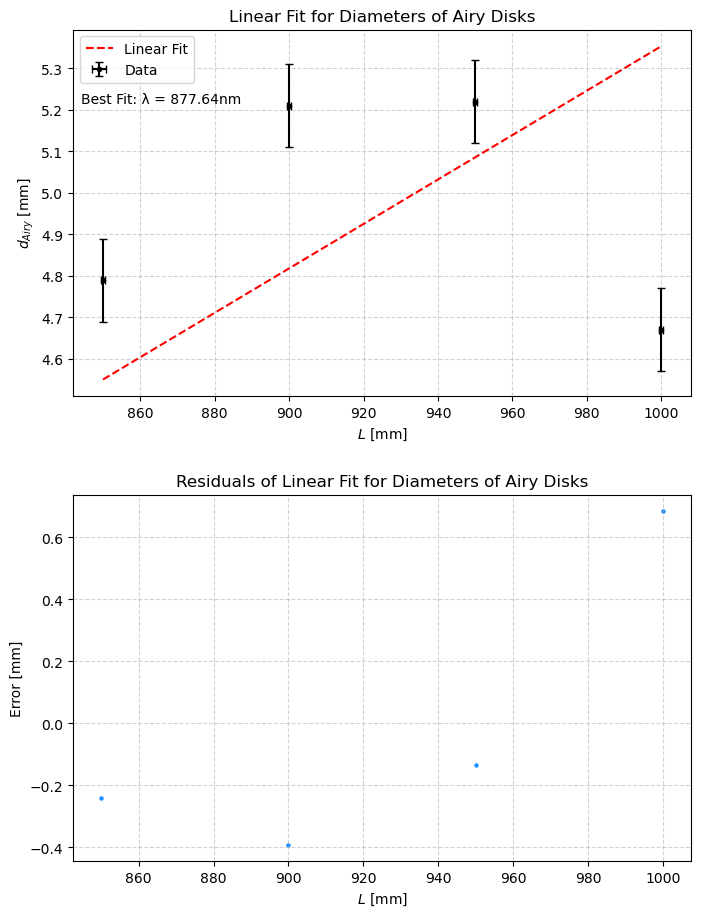

In [5]:
'''Function to calculate the diameter of the Airy disks'''
def airy(params: list, L: float):
    d = (2.44 * L * params[0] * 10**-6) / D
    return d

'''Linear scipy.odr curvefit'''
data = RealData(length_list, diameter_list, length_err, diameter_err)
model = Model(airy)
pguess = [650]
odr = ODR(data, model, pguess)
output = odr.run()
wavelength, wavelength_err = output.beta[0], output.sd_beta[0] / np.sqrt(len(length_list))
residuals = [airy([wavelength], L) - d for L, d in zip(length_list, diameter_list)]
print(f'The best-fit wavelength is \u03BB = {wavelength:.2f} \u00B1 {wavelength_err:.2f}nm.')

'''Plot results'''
length_points = np.linspace(min(length_list), max(length_list), 100, endpoint = True)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (8, 10))
fig.tight_layout(pad = 5.0)

'''First figure --> Linear fit'''
ax1.set_xlabel('$L$ [mm]')
ax1.set_ylabel('$d_{Airy}$ [mm]')
ax1.set_title('Linear Fit for Diameters of Airy Disks')
ax1.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.5)
ax1.plot(length_points, airy([wavelength], length_points), linestyle = 'dashed', color = 'red', label = 'Linear Fit')
ax1.errorbar(length_list, diameter_list, diameter_err, length_err, capsize = 3, fmt = 'k.', label = 'Data')
ax1.legend(loc = 'upper left')
ax1.annotate(f'Best Fit: \u03BB = {wavelength:.2f}nm', xy = (0.142, 0.81), xycoords = 'axes fraction',
             ha = 'center', va = 'center', fontsize = 10)

'''Second figure --> Residuals'''
ax2.set_xlabel('$L$ [mm]')
ax2.set_ylabel('Error [mm]')
ax2.set_title('Residuals of Linear Fit for Diameters of Airy Disks')
ax2.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.5)
ax2.scatter(length_list, residuals, color = 'dodgerblue', s = 5)

'''Save figure'''
fig.savefig('c:/Users/Tucker Knaak/Downloads/WavelengthAiryDisk_LinearFit.png')

#### Double Slit Diffraction

##### Measured data of six bright spot separations.  The wavelength as a function of bright spot separation is given by $\lambda=\frac{a\Delta y_m}{12L}.$

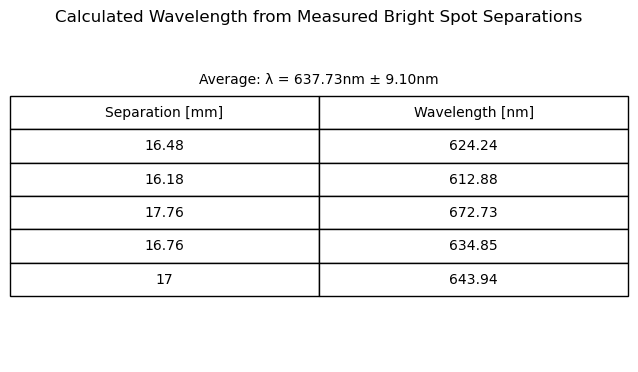

In [6]:
'''Reported data'''
separation_list = [16.48, 16.18, 17.76, 16.76, 17]  #separation between bright spots [mm]

'''Given constants'''
a = 0.25  #distance between slits [mm]
L = 550   #length between slits and screen [mm]

'''Calculated data'''
wavelength_list = [(a * sep * 10**6) / (12 * L) for sep in separation_list]
wavelength, wavelength_err = np.average(wavelength_list), np.std(wavelength_list) / np.sqrt(len(wavelength_list))

'''Plot results'''
table = [[sep, round(wave, 2)] for sep, wave in zip(separation_list, wavelength_list)]
labels = ['Separation [mm]', 'Wavelength [nm]']
fig, ax = plt.subplots(1, 1, figsize = (8, 5))
fig.tight_layout(pad = 5)
ax.axis('off')
ax.set_title('Calculated Wavelength from Measured Bright Spot Separations')
the_table = ax.table(cellText = table, colLabels = labels, loc = 'center', cellLoc = 'center')
the_table.scale(1, 2)
ax.annotate(f'Average: \u03BB = {wavelength:.2f}nm \u00B1 {wavelength_err:.2f}nm', xy = (0.5, 0.85),
            xycoords = 'axes fraction', ha = 'center', va = 'center', fontsize = 10)

'''Save figure'''
fig.savefig('c:/Users/Tucker Knaak/Downloads/WavelengthDoubleSlit.png')